In [8]:
import pandas as pd
import torch
import torch.nn as nn
from torch.nn import functional as f
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader


In [9]:
raw_data = pd.read_csv("train.csv")
raw_data.shape

(8693, 14)

In [10]:
numeric_columns = []
numeric_columns.extend(list (raw_data.dtypes[raw_data.dtypes == np.int64].index))
numeric_columns.extend(list (raw_data.dtypes[raw_data.dtypes == np.float64].index))
numeric_columns

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [11]:
numeric_data = raw_data[numeric_columns]
y = raw_data["Transported"]
numeric_data.shape
y.shape

(8693,)

In [12]:
print(numeric_data.shape)
print(y.shape)

(8693, 6)
(8693,)


In [13]:
sc = StandardScaler()
numeric_data = sc.fit_transform(numeric_data)
type(numeric_data)

numpy.ndarray

In [14]:
class TitanicDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.length = self.x.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return self.length

In [15]:
# Удаляю строки с nan
nan_rows = list(np.argwhere(np.isnan(numeric_data).any(axis=1)))
nan_rows = list(map(int, nan_rows))

numeric_data = numeric_data[~np.isnan(numeric_data).any(axis=1)]

# Удаляю соответствующие строки в таргете
y = y.drop(nan_rows)
print(y)

trainset = TitanicDataset(numeric_data, y)

train_loader = DataLoader(trainset, batch_size=64, shuffle=False)

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 7620, dtype: bool


In [16]:
type(numeric_data)

numpy.ndarray

In [148]:
class Net(nn.Module):
    def __init__(self, input_shape):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 32)
#         self.fc2 = nn.Linear(32, 64)
#         self.fc3 = nn.Linear(64, 1)

#         self.fc1 = nn.Linear(input_shape, 1)

        self.fc2 = nn.Linear(32, 1)
    
    def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.sigmoid(self.fc3(x))

#         x = torch.sigmoid(self.fc1(x))

        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))



        return x



In [18]:
learning_rate = 0.01
epochs = 700

model = Net(input_shape=numeric_data.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

numeric_data.shape

(7620, 6)

In [19]:
numeric_data.dtype

dtype('float64')

In [20]:
losses = []
accur = []

for epoch in range(epochs):
    for j, (x_train, y_train) in enumerate(train_loader):
        
        # Считает выход с модели
        output = model(x_train)
        
        loss = loss_fn(output, y_train.reshape(-1, 1))
        
        
        # Предсказывает и считает точность
        predicted = model(torch.tensor(numeric_data, dtype=torch.float32))
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        
        # Обратное распространение ошибки
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch%50 == 0:
            losses.append(loss)
            accur.append(acc)
            print("epoch {}\tloss : {}\t accuracy : {}".format(epoch, loss,acc))

epoch 0	loss : 0.761397123336792	 accuracy : 0.44330708661417323
epoch 0	loss : 0.6998566389083862	 accuracy : 0.44330708661417323
epoch 0	loss : 0.7260317802429199	 accuracy : 0.44291338582677164
epoch 0	loss : 0.8061861395835876	 accuracy : 0.4431758530183727
epoch 0	loss : 0.7980259656906128	 accuracy : 0.4430446194225722
epoch 0	loss : 0.6558564901351929	 accuracy : 0.4427821522309711
epoch 0	loss : 0.7784900069236755	 accuracy : 0.4461942257217848
epoch 0	loss : 0.7420144081115723	 accuracy : 0.4456692913385827
epoch 0	loss : 0.714896023273468	 accuracy : 0.44606299212598427
epoch 0	loss : 0.8154276609420776	 accuracy : 0.4461942257217848
epoch 0	loss : 0.7067248821258545	 accuracy : 0.45026246719160107
epoch 0	loss : 0.7066243290901184	 accuracy : 0.45026246719160107
epoch 0	loss : 0.6743980646133423	 accuracy : 0.4507874015748031
epoch 0	loss : 0.7477452754974365	 accuracy : 0.45091863517060365
epoch 0	loss : 0.7863900065422058	 accuracy : 0.4506561679790026
epoch 0	loss : 0.770

epoch 50	loss : 0.4943559467792511	 accuracy : 0.7715223097112861
epoch 50	loss : 0.5106924772262573	 accuracy : 0.7715223097112861
epoch 50	loss : 0.5502949953079224	 accuracy : 0.7715223097112861
epoch 50	loss : 0.48941588401794434	 accuracy : 0.7715223097112861
epoch 50	loss : 0.4915843605995178	 accuracy : 0.7715223097112861
epoch 50	loss : 0.463001549243927	 accuracy : 0.7715223097112861
epoch 50	loss : 0.5692198276519775	 accuracy : 0.7715223097112861
epoch 50	loss : 0.5118142366409302	 accuracy : 0.7715223097112861
epoch 50	loss : 0.5473799109458923	 accuracy : 0.7716535433070866
epoch 50	loss : 0.5643922686576843	 accuracy : 0.7716535433070866
epoch 50	loss : 0.5557194948196411	 accuracy : 0.7716535433070866
epoch 50	loss : 0.512658953666687	 accuracy : 0.7716535433070866
epoch 50	loss : 0.5635926723480225	 accuracy : 0.7720472440944882
epoch 50	loss : 0.5697785019874573	 accuracy : 0.7723097112860893
epoch 50	loss : 0.3761064112186432	 accuracy : 0.7720472440944882
epoch 100	l

epoch 150	loss : 0.5456820726394653	 accuracy : 0.7778215223097112
epoch 150	loss : 0.5177103877067566	 accuracy : 0.7779527559055118
epoch 150	loss : 0.45677557587623596	 accuracy : 0.7779527559055118
epoch 150	loss : 0.42904582619667053	 accuracy : 0.7780839895013123
epoch 150	loss : 0.4479884207248688	 accuracy : 0.7780839895013123
epoch 150	loss : 0.5142661333084106	 accuracy : 0.7779527559055118
epoch 150	loss : 0.43217623233795166	 accuracy : 0.7779527559055118
epoch 150	loss : 0.49125364422798157	 accuracy : 0.7779527559055118
epoch 150	loss : 0.5569370985031128	 accuracy : 0.7779527559055118
epoch 150	loss : 0.5451600551605225	 accuracy : 0.7779527559055118
epoch 150	loss : 0.42798298597335815	 accuracy : 0.7780839895013123
epoch 150	loss : 0.5378676652908325	 accuracy : 0.7779527559055118
epoch 150	loss : 0.49191543459892273	 accuracy : 0.7780839895013123
epoch 150	loss : 0.6050740480422974	 accuracy : 0.7782152230971129
epoch 150	loss : 0.48630380630493164	 accuracy : 0.77821

epoch 250	loss : 0.5488359332084656	 accuracy : 0.779002624671916
epoch 250	loss : 0.5121683478355408	 accuracy : 0.7791338582677165
epoch 250	loss : 0.44703254103660583	 accuracy : 0.779002624671916
epoch 250	loss : 0.42137420177459717	 accuracy : 0.7791338582677165
epoch 250	loss : 0.4467761814594269	 accuracy : 0.7791338582677165
epoch 250	loss : 0.5177462100982666	 accuracy : 0.7791338582677165
epoch 250	loss : 0.4246862828731537	 accuracy : 0.779002624671916
epoch 250	loss : 0.48527470231056213	 accuracy : 0.779002624671916
epoch 250	loss : 0.5553730130195618	 accuracy : 0.779002624671916
epoch 250	loss : 0.5470303297042847	 accuracy : 0.779002624671916
epoch 250	loss : 0.42206794023513794	 accuracy : 0.779002624671916
epoch 250	loss : 0.5358523726463318	 accuracy : 0.779002624671916
epoch 250	loss : 0.48313000798225403	 accuracy : 0.7791338582677165
epoch 250	loss : 0.6052681803703308	 accuracy : 0.7791338582677165
epoch 250	loss : 0.48474743962287903	 accuracy : 0.77913385826771

epoch 350	loss : 0.5504583120346069	 accuracy : 0.7799212598425197
epoch 350	loss : 0.5100722908973694	 accuracy : 0.7799212598425197
epoch 350	loss : 0.4432595670223236	 accuracy : 0.7799212598425197
epoch 350	loss : 0.4186086654663086	 accuracy : 0.7799212598425197
epoch 350	loss : 0.4465833604335785	 accuracy : 0.7799212598425197
epoch 350	loss : 0.519404947757721	 accuracy : 0.7799212598425197
epoch 350	loss : 0.42188316583633423	 accuracy : 0.7799212598425197
epoch 350	loss : 0.48291081190109253	 accuracy : 0.7799212598425197
epoch 350	loss : 0.5551252365112305	 accuracy : 0.7799212598425197
epoch 350	loss : 0.5480390787124634	 accuracy : 0.7799212598425197
epoch 350	loss : 0.41990914940834045	 accuracy : 0.7800524934383202
epoch 350	loss : 0.5353145599365234	 accuracy : 0.7799212598425197
epoch 350	loss : 0.47970420122146606	 accuracy : 0.7800524934383202
epoch 350	loss : 0.6056867837905884	 accuracy : 0.7800524934383202
epoch 350	loss : 0.4845527708530426	 accuracy : 0.780052493

epoch 450	loss : 0.5512431859970093	 accuracy : 0.7801837270341208
epoch 450	loss : 0.5091801881790161	 accuracy : 0.7801837270341208
epoch 450	loss : 0.44162073731422424	 accuracy : 0.7801837270341208
epoch 450	loss : 0.4174543023109436	 accuracy : 0.7803149606299212
epoch 450	loss : 0.4465491473674774	 accuracy : 0.7801837270341208
epoch 450	loss : 0.5201675295829773	 accuracy : 0.7801837270341208
epoch 450	loss : 0.4206971526145935	 accuracy : 0.7803149606299212
epoch 450	loss : 0.4818703532218933	 accuracy : 0.7801837270341208
epoch 450	loss : 0.5551021695137024	 accuracy : 0.7803149606299212
epoch 450	loss : 0.5485347509384155	 accuracy : 0.7803149606299212
epoch 450	loss : 0.4189978241920471	 accuracy : 0.7803149606299212
epoch 450	loss : 0.5351350903511047	 accuracy : 0.7803149606299212
epoch 450	loss : 0.4782128930091858	 accuracy : 0.7803149606299212
epoch 450	loss : 0.6059455871582031	 accuracy : 0.7804461942257218
epoch 450	loss : 0.48457202315330505	 accuracy : 0.7803149606

epoch 550	loss : 0.5516176223754883	 accuracy : 0.7804461942257218
epoch 550	loss : 0.5087805390357971	 accuracy : 0.7803149606299212
epoch 550	loss : 0.44087380170822144	 accuracy : 0.7805774278215223
epoch 550	loss : 0.416940301656723	 accuracy : 0.7804461942257218
epoch 550	loss : 0.44654303789138794	 accuracy : 0.7804461942257218
epoch 550	loss : 0.5205191969871521	 accuracy : 0.7804461942257218
epoch 550	loss : 0.42016637325286865	 accuracy : 0.7804461942257218
epoch 550	loss : 0.4813922047615051	 accuracy : 0.7804461942257218
epoch 550	loss : 0.5551136136054993	 accuracy : 0.7804461942257218
epoch 550	loss : 0.5487738251686096	 accuracy : 0.7804461942257218
epoch 550	loss : 0.41858774423599243	 accuracy : 0.7803149606299212
epoch 550	loss : 0.535067081451416	 accuracy : 0.7804461942257218
epoch 550	loss : 0.4775329530239105	 accuracy : 0.7805774278215223
epoch 550	loss : 0.6060818433761597	 accuracy : 0.7803149606299212
epoch 550	loss : 0.48460865020751953	 accuracy : 0.780314960

epoch 650	loss : 0.5517958402633667	 accuracy : 0.7803149606299212
epoch 650	loss : 0.5085960030555725	 accuracy : 0.7803149606299212
epoch 650	loss : 0.4405258893966675	 accuracy : 0.7805774278215223
epoch 650	loss : 0.41670432686805725	 accuracy : 0.7804461942257218
epoch 650	loss : 0.4465421140193939	 accuracy : 0.7804461942257218
epoch 650	loss : 0.5206824541091919	 accuracy : 0.7805774278215223
epoch 650	loss : 0.41992223262786865	 accuracy : 0.7805774278215223
epoch 650	loss : 0.4811682403087616	 accuracy : 0.7805774278215223
epoch 650	loss : 0.5551245808601379	 accuracy : 0.7805774278215223
epoch 650	loss : 0.548888087272644	 accuracy : 0.7803149606299212
epoch 650	loss : 0.4183984398841858	 accuracy : 0.7803149606299212
epoch 650	loss : 0.5350387096405029	 accuracy : 0.7805774278215223
epoch 650	loss : 0.47721603512763977	 accuracy : 0.7804461942257218
epoch 650	loss : 0.6061497330665588	 accuracy : 0.7804461942257218
epoch 650	loss : 0.4846341609954834	 accuracy : 0.7804461942

Text(0, 0.5, 'loss')

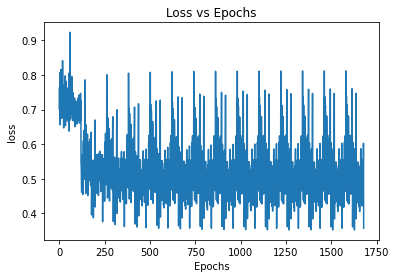

In [21]:
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

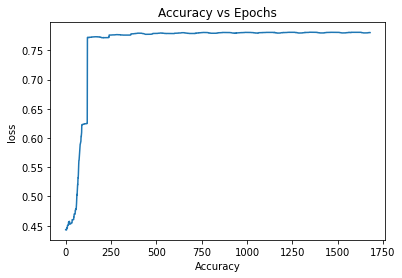

In [22]:
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [23]:
test_raw_data = pd.read_csv("test.csv")

test_numeric_data = test_raw_data[numeric_columns].fillna(0)

test_y = model(torch.tensor(test_numeric_data.values, dtype=torch.float))
test_y

tensor([[0.5924],
        [0.0000],
        [0.6314],
        ...,
        [0.3235],
        [1.0000],
        [0.7374]], grad_fn=<SigmoidBackward0>)

In [24]:
# test_y.loc[test_y.my_channel > 20000, 'my_channel'] = 0
test_y_df = pd.DataFrame(test_y.detach().numpy(), columns=["result"])
test_y_df.loc[test_y_df.result > 0.5, "result"] = True
test_y_df.loc[test_y_df.result <= 0.5, "result"] = False

transported = test_y_df.squeeze()

submission = pd.DataFrame({"PassengerId": test_raw_data.PassengerId, "Transported": transported})

submission.to_csv("submission.csv", index=None)
submission.head()


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [25]:
non_numeric_columns = [col for col in list(raw_data.columns) if col not in numeric_columns]
non_numeric_columns.remove("PassengerId")
# non_numeric_columns.remove("Transported")
non_numeric_columns.remove("Name")
non_numeric_columns.remove("Cabin")

print(non_numeric_columns)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']


In [26]:
non_numeric_data = raw_data[non_numeric_columns]
non_numeric_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'], dtype='object')

In [27]:
non_numeric_data = non_numeric_data.dropna()

y = non_numeric_data["Transported"]
non_numeric_columns.remove("Transported")

non_numeric_data = non_numeric_data.drop("Transported", axis=1)

one_hot_non_num_data = pd.get_dummies(non_numeric_data[non_numeric_columns])
print(one_hot_non_num_data.shape)
print(y.shape)

(7913, 10)
(7913,)


In [28]:
one_hot_non_num_data = one_hot_non_num_data.to_numpy(dtype=np.float32)

In [29]:
non_numeric_x = torch.tensor(one_hot_non_num_data, dtype=torch.float32)

trainset = TitanicDataset(torch.tensor(one_hot_non_num_data), y)

train_loader = DataLoader(trainset, batch_size=64, shuffle=False)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
model2 = Net(input_shape=one_hot_non_num_data.shape[1])
optimizer = torch.optim.AdamW(model2.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

In [31]:
losses2 = []
accur2 = []

for epoch in range(epochs):
    for j, (x_train, y_train) in enumerate(train_loader):
        
        # Считает выход с модели
        output = model2(x_train)
#         print(output.shape)
#         print(y_train.shape)

        loss = loss_fn(output, y_train.reshape(-1, 1))
        
        # Предсказывает и считает точность
        predicted = model2(torch.tensor(one_hot_non_num_data, dtype=torch.float32))
#         print("UWAGA!", predicted.reshape(-1).detach().numpy().round() == y)
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        
        # Обратное распространение ошибки
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch%50 == 0:
            losses2.append(loss)
            accur2.append(acc)
            print("epoch {}\tloss : {}\t accuracy : {}".format(epoch, loss,acc))

epoch 0	loss : 0.6760921478271484	 accuracy : 0.6922785290029067
epoch 0	loss : 0.6270176768302917	 accuracy : 0.6922785290029067
epoch 0	loss : 0.6388287544250488	 accuracy : 0.6922785290029067
epoch 0	loss : 0.6190447211265564	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6430200934410095	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6208468079566956	 accuracy : 0.7079489447744218
epoch 0	loss : 0.591748833656311	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6160104274749756	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6246793866157532	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6518743634223938	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6144355535507202	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6408141851425171	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6336466073989868	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6159442067146301	 accuracy : 0.7079489447744218
epoch 0	loss : 0.6200155019760132	 accuracy : 0.7079489447744218
epoch 0	loss : 0.618904948

epoch 100	loss : 0.7079590559005737	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5169757604598999	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5635734796524048	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 100	loss : 0.6161906719207764	 accuracy : 0.7131302919246809
epoch 100	loss : 0.53947913646698	 accuracy : 0.7131302919246809
epoch 100	loss : 0.4754778742790222	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5336666703224182	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5532386302947998	 accuracy : 0.7131302919246809
epoch 100	loss : 0.6239569783210754	 accuracy : 0.7131302919246809
epoch 100	loss : 0.545706033706665	 accuracy : 0.7131302919246809
epoch 100	loss : 0.6165497303009033	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5576368570327759	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5496891140937805	 accuracy : 0.7131302919246809
epoch 100	loss : 0.5264621376991272	 accuracy : 0.713130291924680

epoch 150	loss : 0.7079599499702454	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5169752836227417	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5635737776756287	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 150	loss : 0.6161903738975525	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5394790172576904	 accuracy : 0.7131302919246809
epoch 150	loss : 0.47547799348831177	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5336654186248779	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5532386302947998	 accuracy : 0.7131302919246809
epoch 150	loss : 0.6239566802978516	 accuracy : 0.7131302919246809
epoch 150	loss : 0.545705258846283	 accuracy : 0.7131302919246809
epoch 150	loss : 0.6165496110916138	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5576367974281311	 accuracy : 0.7131302919246809
epoch 150	loss : 0.549690306186676	 accuracy : 0.7131302919246809
epoch 150	loss : 0.5264620184898376	 accuracy : 0.7131302919246

epoch 200	loss : 0.7079602479934692	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5169751644134521	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5635737180709839	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 200	loss : 0.6161905527114868	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5394788980484009	 accuracy : 0.7131302919246809
epoch 200	loss : 0.4754779040813446	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5336653590202332	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5532386302947998	 accuracy : 0.7131302919246809
epoch 200	loss : 0.6239569187164307	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5457053184509277	 accuracy : 0.7131302919246809
epoch 200	loss : 0.6165497303009033	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5576367974281311	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5496904253959656	 accuracy : 0.7131302919246809
epoch 200	loss : 0.5264619588851929	 accuracy : 0.713130291924

epoch 250	loss : 0.7079607248306274	 accuracy : 0.7131302919246809
epoch 250	loss : 0.516974925994873	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5635737776756287	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 250	loss : 0.6161908507347107	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5394788384437561	 accuracy : 0.7131302919246809
epoch 250	loss : 0.4754776954650879	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5336652398109436	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5532387495040894	 accuracy : 0.7131302919246809
epoch 250	loss : 0.6239573359489441	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5457054972648621	 accuracy : 0.7131302919246809
epoch 250	loss : 0.6165500283241272	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5576367378234863	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5496904850006104	 accuracy : 0.7131302919246809
epoch 250	loss : 0.5264620184898376	 accuracy : 0.7131302919246

epoch 300	loss : 0.7079604864120483	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5169750452041626	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5635738968849182	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 300	loss : 0.6161906123161316	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5394789576530457	 accuracy : 0.7131302919246809
epoch 300	loss : 0.4754777252674103	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5336652994155884	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5532386898994446	 accuracy : 0.7131302919246809
epoch 300	loss : 0.623957097530365	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5457053184509277	 accuracy : 0.7131302919246809
epoch 300	loss : 0.6165498495101929	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5576367974281311	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5496903657913208	 accuracy : 0.7131302919246809
epoch 300	loss : 0.5264619588851929	 accuracy : 0.7131302919246

epoch 350	loss : 0.7079598903656006	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5169752240180969	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5635737180709839	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5304827094078064	 accuracy : 0.7131302919246809
epoch 350	loss : 0.6161904335021973	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5394788384437561	 accuracy : 0.7131302919246809
epoch 350	loss : 0.47547802329063416	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5336653590202332	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5532386302947998	 accuracy : 0.7131302919246809
epoch 350	loss : 0.6239567995071411	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5457053184509277	 accuracy : 0.7131302919246809
epoch 350	loss : 0.6165496110916138	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5576368570327759	 accuracy : 0.7131302919246809
epoch 350	loss : 0.549690306186676	 accuracy : 0.7131302919246809
epoch 350	loss : 0.5264620780944824	 accuracy : 0.713130291924

epoch 400	loss : 0.7079606056213379	 accuracy : 0.7131302919246809
epoch 400	loss : 0.516974925994873	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5635737180709839	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 400	loss : 0.6161907911300659	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5394788384437561	 accuracy : 0.7131302919246809
epoch 400	loss : 0.4754777252674103	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5336652398109436	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5532386898994446	 accuracy : 0.7131302919246809
epoch 400	loss : 0.6239572763442993	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5457053780555725	 accuracy : 0.7131302919246809
epoch 400	loss : 0.6165499687194824	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5576367378234863	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5496904850006104	 accuracy : 0.7131302919246809
epoch 400	loss : 0.5264619588851929	 accuracy : 0.7131302919246

epoch 450	loss : 0.7079604864120483	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5169751048088074	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5635738968849182	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 450	loss : 0.6161906123161316	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5394789576530457	 accuracy : 0.7131302919246809
epoch 450	loss : 0.47547775506973267	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5336652398109436	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5532386898994446	 accuracy : 0.7131302919246809
epoch 450	loss : 0.6239570379257202	 accuracy : 0.7131302919246809
epoch 450	loss : 0.545705258846283	 accuracy : 0.7131302919246809
epoch 450	loss : 0.6165498495101929	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5576367378234863	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5496904253959656	 accuracy : 0.7131302919246809
epoch 450	loss : 0.5264620184898376	 accuracy : 0.713130291924

epoch 500	loss : 0.7079601287841797	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5169751048088074	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5635735988616943	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5304825901985168	 accuracy : 0.7131302919246809
epoch 500	loss : 0.616190493106842	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5394787788391113	 accuracy : 0.7131302919246809
epoch 500	loss : 0.475477933883667	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5336654186248779	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5532386302947998	 accuracy : 0.7131302919246809
epoch 500	loss : 0.6239568591117859	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5457053780555725	 accuracy : 0.7131302919246809
epoch 500	loss : 0.6165497303009033	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5576367974281311	 accuracy : 0.7131302919246809
epoch 500	loss : 0.549690306186676	 accuracy : 0.7131302919246809
epoch 500	loss : 0.5264620184898376	 accuracy : 0.713130291924680

epoch 550	loss : 0.7079605460166931	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5169750452041626	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5635738372802734	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5304827094078064	 accuracy : 0.7131302919246809
epoch 550	loss : 0.6161906719207764	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5394788980484009	 accuracy : 0.7131302919246809
epoch 550	loss : 0.47547775506973267	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5336652398109436	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5532386302947998	 accuracy : 0.7131302919246809
epoch 550	loss : 0.6239571571350098	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5457053184509277	 accuracy : 0.7131302919246809
epoch 550	loss : 0.6165499091148376	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5576367378234863	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5496903657913208	 accuracy : 0.7131302919246809
epoch 550	loss : 0.5264619588851929	 accuracy : 0.71313029192

epoch 600	loss : 0.7079599499702454	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5169752836227417	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5635735988616943	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 600	loss : 0.616190493106842	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5394788384437561	 accuracy : 0.7131302919246809
epoch 600	loss : 0.47547802329063416	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5336654186248779	 accuracy : 0.7131302919246809
epoch 600	loss : 0.553238570690155	 accuracy : 0.7131302919246809
epoch 600	loss : 0.6239567399024963	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5457053780555725	 accuracy : 0.7131302919246809
epoch 600	loss : 0.6165496110916138	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5576368570327759	 accuracy : 0.7131302919246809
epoch 600	loss : 0.549690306186676	 accuracy : 0.7131302919246809
epoch 600	loss : 0.5264620184898376	 accuracy : 0.71313029192468

epoch 650	loss : 0.7079604268074036	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5169750452041626	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5635737180709839	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5304826498031616	 accuracy : 0.7131302919246809
epoch 650	loss : 0.6161907911300659	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5394788980484009	 accuracy : 0.7131302919246809
epoch 650	loss : 0.47547781467437744	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5336652994155884	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5532386898994446	 accuracy : 0.7131302919246809
epoch 650	loss : 0.6239571571350098	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5457054376602173	 accuracy : 0.7131302919246809
epoch 650	loss : 0.6165499091148376	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5576367378234863	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5496903657913208	 accuracy : 0.7131302919246809
epoch 650	loss : 0.5264619588851929	 accuracy : 0.71313029192

Text(0, 0.5, 'loss')

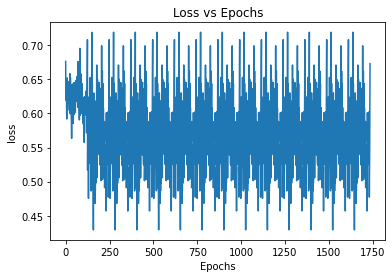

In [32]:
plt.plot(losses2)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

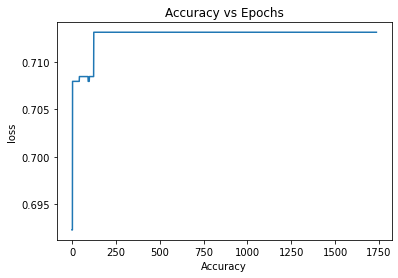

In [33]:
plt.plot(accur2)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [34]:
non_numeric_columns

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [35]:
test_raw_data = pd.read_csv("test.csv")
print(test_raw_data.shape)

test_non_numeric_data = test_raw_data[non_numeric_columns].fillna(0)

one_hot_test_data = pd.get_dummies(test_non_numeric_data[non_numeric_columns])

one_hot_test_data = one_hot_test_data.drop("HomePlanet_0", axis=1)
one_hot_test_data = one_hot_test_data.drop("Destination_0", axis=1)

a = torch.tensor(one_hot_test_data.values, dtype=torch.float)

test_y = model2(a)


(4277, 13)


In [36]:
test_y_df = pd.DataFrame(test_y.detach().numpy(), columns=["result"])
test_y_df.loc[test_y_df.result > 0.5, "result"] = True
test_y_df.loc[test_y_df.result <= 0.5, "result"] = False

transported = test_y_df.squeeze()

submission = pd.DataFrame({"PassengerId": test_raw_data.PassengerId, "Transported": transported})

submission.to_csv("submission.csv", index=None)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


## Объединение числовых и категориальных данных

In [150]:
# non_numeric_columns.append("Transported")

# non_numeric_columns.remove("Transported")
non_numeric_columns

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

In [151]:

entire_data_columns = []
entire_data_columns.extend(numeric_columns)
entire_data_columns.extend(non_numeric_columns)


print(non_numeric_columns)


entire_data = raw_data[entire_data_columns]
entire_data

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,False,TRAPPIST-1e,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,False,TRAPPIST-1e,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,False,TRAPPIST-1e,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,False,TRAPPIST-1e,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,False,TRAPPIST-1e,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,Europa,False,55 Cancri e,True,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,Earth,True,PSO J318.5-22,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,Earth,False,TRAPPIST-1e,False,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,Europa,False,55 Cancri e,False,False


In [152]:
# Удаляю строки с nan
# nan_rows = list(np.argwhere(np.isnan(entire_data).any(axis=1)))
# nan_rows = list(map(int, nan_rows))

# entire_data = numeric_data[~np.isnan(entire_data).any(axis=1)]

# Удаляю соответствующие строки в таргете
# y = y.drop(nan_rows)

entire_data = entire_data.dropna()
entire_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,False,TRAPPIST-1e,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,False,TRAPPIST-1e,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,False,TRAPPIST-1e,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,False,TRAPPIST-1e,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,False,TRAPPIST-1e,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,Europa,False,55 Cancri e,True,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,Earth,True,PSO J318.5-22,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,Earth,False,TRAPPIST-1e,False,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,Europa,False,55 Cancri e,False,False


In [153]:
y = entire_data["Transported"]
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6923, dtype: bool

In [154]:
non_numeric_columns.remove("Transported")
non_numeric_columns

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [155]:
one_hot_test_data = pd.get_dummies(entire_data[non_numeric_columns])
one_hot_test_data

entire_data_numeric = entire_data[numeric_columns]



numeric_with_ohe_data = pd.concat([entire_data_numeric, one_hot_test_data], axis=1)

sc = StandardScaler()
numeric_with_ohe_data[numeric_columns] = sc.fit_transform(numeric_with_ohe_data[numeric_columns])

numeric_with_ohe_data.shape, y.shape

numeric_with_ohe_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.696478,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,0,1,0,1,0,0,0,1,1,0
1,-0.337043,-0.173745,-0.281849,-0.243585,0.199122,-0.230830,1,0,0,1,0,0,0,1,1,0
2,2.005605,-0.271688,1.850701,-0.283044,5.518474,-0.226387,0,1,0,1,0,0,0,1,0,1
3,0.283070,-0.335500,0.479819,0.302527,2.597403,-0.098429,0,1,0,1,0,0,0,1,1,0
4,-0.888254,0.114149,-0.245379,-0.044712,0.212925,-0.268151,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.834281,-0.335500,3.789546,-0.283044,1.142906,-0.204172,0,1,0,1,0,1,0,0,0,1
8689,-0.750451,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,1,0,0,0,1,0,1,0,1,0
8690,-0.199240,-0.335500,-0.287229,2.671645,-0.273633,-0.269928,1,0,0,1,0,0,0,1,1,0
8691,0.214169,-0.335500,0.339921,-0.283044,0.030035,2.604689,0,1,0,1,0,1,0,0,1,0


In [156]:
numeric_with_ohe_data_x = torch.tensor(numeric_with_ohe_data.to_numpy(dtype=np.float32), 
                                       dtype=torch.float32)

trainset = TitanicDataset(numeric_with_ohe_data_x, y)

train_loader = DataLoader(trainset, batch_size=64, shuffle=False)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [157]:
model3 = Net(input_shape=numeric_with_ohe_data.shape[1])
optimizer = torch.optim.AdamW(model3.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

In [158]:
losses3 = []
accur3 = []

for epoch in range(epochs):
    for j, (x_train, y_train) in enumerate(train_loader):
        
        # Считает выход с модели
        output = model3(x_train)
#         print(output.shape)
#         print(y_train.shape)

        loss = loss_fn(output, y_train.reshape(-1, 1))
        
        # Предсказывает и считает точность
        predicted = model3(numeric_with_ohe_data_x)
#         print("UWAGA!", predicted.reshape(-1).detach().numpy().round() == y)
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        
        # Обратное распространение ошибки
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch%50 == 0:
            losses3.append(loss)
            accur3.append(acc)
            print("epoch {}\tloss : {}\t accuracy : {}".format(epoch, loss,acc))

epoch 0	loss : 0.7053049206733704	 accuracy : 0.522605806731186
epoch 0	loss : 0.6920061707496643	 accuracy : 0.5247724974721941
epoch 0	loss : 0.6873490810394287	 accuracy : 0.526072511916799
epoch 0	loss : 0.7136321663856506	 accuracy : 0.5282392026578073
epoch 0	loss : 0.7035180330276489	 accuracy : 0.5296836631518128
epoch 0	loss : 0.6939354538917542	 accuracy : 0.5314170157446194
epoch 0	loss : 0.7061126232147217	 accuracy : 0.5343059367326304
epoch 0	loss : 0.6932719349861145	 accuracy : 0.5373393037700419
epoch 0	loss : 0.6759107708930969	 accuracy : 0.5382059800664452
epoch 0	loss : 0.6961175799369812	 accuracy : 0.5412393471038567
epoch 0	loss : 0.6804412603378296	 accuracy : 0.5458616206846743
epoch 0	loss : 0.6815257668495178	 accuracy : 0.5529394771053012
epoch 0	loss : 0.7059684991836548	 accuracy : 0.5556839520439116
epoch 0	loss : 0.6950404644012451	 accuracy : 0.5618951321681352
epoch 0	loss : 0.6787470579147339	 accuracy : 0.5711396793297703
epoch 0	loss : 0.6700972914

epoch 50	loss : 0.43059855699539185	 accuracy : 0.8048533872598584
epoch 50	loss : 0.397688627243042	 accuracy : 0.8051422793586596
epoch 50	loss : 0.4105251431465149	 accuracy : 0.8048533872598584
epoch 50	loss : 0.3993240296840668	 accuracy : 0.8039867109634552
epoch 50	loss : 0.3809269964694977	 accuracy : 0.8039867109634552
epoch 50	loss : 0.34284424781799316	 accuracy : 0.8028311425682507
epoch 50	loss : 0.5407727360725403	 accuracy : 0.8029755886176513
epoch 50	loss : 0.4808122515678406	 accuracy : 0.8032644807164524
epoch 100	loss : 0.5109131336212158	 accuracy : 0.8042756030622562
epoch 100	loss : 0.35847902297973633	 accuracy : 0.8042756030622562
epoch 100	loss : 0.36899083852767944	 accuracy : 0.8029755886176513
epoch 100	loss : 0.4053143262863159	 accuracy : 0.8038422649140546
epoch 100	loss : 0.3440549373626709	 accuracy : 0.8032644807164524
epoch 100	loss : 0.31336042284965515	 accuracy : 0.8032644807164524
epoch 100	loss : 0.37678056955337524	 accuracy : 0.803697818864654

epoch 150	loss : 0.30755099654197693	 accuracy : 0.8051422793586596
epoch 150	loss : 0.3194955587387085	 accuracy : 0.804997833309259
epoch 150	loss : 0.43480709195137024	 accuracy : 0.8061534017044634
epoch 150	loss : 0.3913453221321106	 accuracy : 0.8054311714574607
epoch 150	loss : 0.4132392704486847	 accuracy : 0.8061534017044634
epoch 150	loss : 0.42300230264663696	 accuracy : 0.8062978477538639
epoch 150	loss : 0.37469831109046936	 accuracy : 0.8060089556550628
epoch 150	loss : 0.33943963050842285	 accuracy : 0.806586739852665
epoch 150	loss : 0.5302346348762512	 accuracy : 0.8068756319514662
epoch 150	loss : 0.42875194549560547	 accuracy : 0.8077423082478694
epoch 200	loss : 0.5016355514526367	 accuracy : 0.8070200780008667
epoch 200	loss : 0.3608006536960602	 accuracy : 0.8061534017044634
epoch 200	loss : 0.37582212686538696	 accuracy : 0.8057200635562617
epoch 200	loss : 0.3965398967266083	 accuracy : 0.8044200491116568
epoch 200	loss : 0.3279016613960266	 accuracy : 0.8042756

epoch 250	loss : 0.3892345726490021	 accuracy : 0.8013866820742452
epoch 250	loss : 0.3321933150291443	 accuracy : 0.8028311425682507
epoch 250	loss : 0.2947550415992737	 accuracy : 0.8038422649140546
epoch 250	loss : 0.40368008613586426	 accuracy : 0.8036978188646541
epoch 250	loss : 0.4210403263568878	 accuracy : 0.8039867109634552
epoch 250	loss : 0.43474021553993225	 accuracy : 0.8041311570128556
epoch 250	loss : 0.33747851848602295	 accuracy : 0.8048533872598584
epoch 250	loss : 0.39203664660453796	 accuracy : 0.8052867254080601
epoch 250	loss : 0.4769335389137268	 accuracy : 0.804997833309259
epoch 250	loss : 0.34443509578704834	 accuracy : 0.8048533872598584
epoch 250	loss : 0.37636080384254456	 accuracy : 0.8062978477538639
epoch 250	loss : 0.4175613224506378	 accuracy : 0.8067311859020656
epoch 250	loss : 0.4086417853832245	 accuracy : 0.8070200780008667
epoch 250	loss : 0.3032221794128418	 accuracy : 0.8067311859020656
epoch 250	loss : 0.3179031312465668	 accuracy : 0.8073089

epoch 300	loss : 0.3163502812385559	 accuracy : 0.8087534305936732
epoch 300	loss : 0.4160889685153961	 accuracy : 0.8081756463960711
epoch 300	loss : 0.38380172848701477	 accuracy : 0.8083200924454716
epoch 300	loss : 0.40293005108833313	 accuracy : 0.8088978766430738
epoch 300	loss : 0.4236060678958893	 accuracy : 0.809475660840676
epoch 300	loss : 0.3759721517562866	 accuracy : 0.8086089845442728
epoch 300	loss : 0.33768877387046814	 accuracy : 0.8074534161490683
epoch 300	loss : 0.5072690844535828	 accuracy : 0.8081756463960711
epoch 300	loss : 0.40508392453193665	 accuracy : 0.8081756463960711
epoch 350	loss : 0.4932684600353241	 accuracy : 0.8057200635562617
epoch 350	loss : 0.36163583397865295	 accuracy : 0.8060089556550628
epoch 350	loss : 0.3683154582977295	 accuracy : 0.8058645096056622
epoch 350	loss : 0.38848209381103516	 accuracy : 0.8052867254080601
epoch 350	loss : 0.3185218274593353	 accuracy : 0.8051422793586596
epoch 350	loss : 0.3015923500061035	 accuracy : 0.8058645

epoch 400	loss : 0.39286041259765625	 accuracy : 0.8107756752852809
epoch 400	loss : 0.3037581741809845	 accuracy : 0.8106312292358804
epoch 400	loss : 0.30787619948387146	 accuracy : 0.8096201068900766
epoch 400	loss : 0.41644471883773804	 accuracy : 0.8093312147912755
epoch 400	loss : 0.3751421868801117	 accuracy : 0.8086089845442728
epoch 400	loss : 0.4002334475517273	 accuracy : 0.8081756463960711
epoch 400	loss : 0.4218706786632538	 accuracy : 0.8083200924454716
epoch 400	loss : 0.3739253878593445	 accuracy : 0.8086089845442728
epoch 400	loss : 0.33456751704216003	 accuracy : 0.80788675429727
epoch 400	loss : 0.4954290986061096	 accuracy : 0.8070200780008667
epoch 400	loss : 0.3876633644104004	 accuracy : 0.8070200780008667
epoch 450	loss : 0.49334925413131714	 accuracy : 0.806586739852665
epoch 450	loss : 0.36045706272125244	 accuracy : 0.8074534161490683
epoch 450	loss : 0.3686293363571167	 accuracy : 0.8081756463960711
epoch 450	loss : 0.382798969745636	 accuracy : 0.8073089700

epoch 500	loss : 0.30202487111091614	 accuracy : 0.8110645673840821
epoch 500	loss : 0.3033957779407501	 accuracy : 0.8113534594828832
epoch 500	loss : 0.41665634512901306	 accuracy : 0.8103423371370793
epoch 500	loss : 0.37338611483573914	 accuracy : 0.8099089989888777
epoch 500	loss : 0.3960776925086975	 accuracy : 0.8084645384948722
epoch 500	loss : 0.4253680109977722	 accuracy : 0.8091867687418749
epoch 500	loss : 0.36780494451522827	 accuracy : 0.8087534305936732
epoch 500	loss : 0.3343857228755951	 accuracy : 0.8090423226924743
epoch 500	loss : 0.4892449378967285	 accuracy : 0.80788675429727
epoch 500	loss : 0.38013705611228943	 accuracy : 0.8074534161490683
epoch 550	loss : 0.4932084381580353	 accuracy : 0.8073089700996677
epoch 550	loss : 0.3564857244491577	 accuracy : 0.8071645240502672
epoch 550	loss : 0.3651062548160553	 accuracy : 0.8074534161490683
epoch 550	loss : 0.38223832845687866	 accuracy : 0.8075978621984689
epoch 550	loss : 0.31571123003959656	 accuracy : 0.8081756

epoch 600	loss : 0.30061739683151245	 accuracy : 0.8117867976310847
epoch 600	loss : 0.4145902395248413	 accuracy : 0.8112090134334826
epoch 600	loss : 0.37262868881225586	 accuracy : 0.8103423371370793
epoch 600	loss : 0.3920495808124542	 accuracy : 0.8090423226924743
epoch 600	loss : 0.422795832157135	 accuracy : 0.8084645384948722
epoch 600	loss : 0.36555373668670654	 accuracy : 0.809475660840676
epoch 600	loss : 0.33586838841438293	 accuracy : 0.8099089989888777
epoch 600	loss : 0.4884204864501953	 accuracy : 0.8086089845442728
epoch 600	loss : 0.3764708340167999	 accuracy : 0.8075978621984689
epoch 650	loss : 0.49382805824279785	 accuracy : 0.8077423082478694
epoch 650	loss : 0.356258362531662	 accuracy : 0.8077423082478694
epoch 650	loss : 0.36622583866119385	 accuracy : 0.8080312003466705
epoch 650	loss : 0.3827543556690216	 accuracy : 0.8075978621984689
epoch 650	loss : 0.3141568601131439	 accuracy : 0.8074534161490683
epoch 650	loss : 0.300456166267395	 accuracy : 0.8073089700

Text(0, 0.5, 'loss')

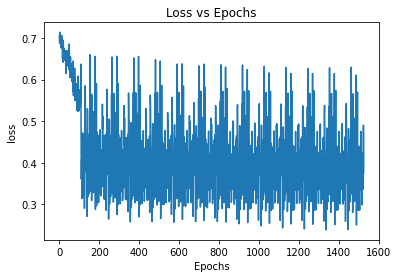

In [159]:
plt.plot(losses3)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

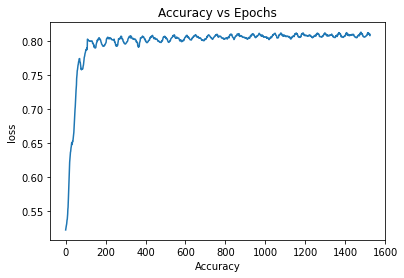

In [160]:
plt.plot(accur3)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [161]:
test_raw_data = pd.read_csv("test.csv")
# print(test_raw_data.shape)

test_data = test_raw_data.fillna(0)

non_num_test_data = test_data[non_numeric_columns]

one_hot_test_data = pd.get_dummies(non_num_test_data[non_numeric_columns])

one_hot_test_data = one_hot_test_data.drop("HomePlanet_0", axis=1)
one_hot_test_data = one_hot_test_data.drop("Destination_0", axis=1)


numeric_test_data = test_data[numeric_columns]

entire_test_data = pd.concat([numeric_test_data, one_hot_test_data], axis=1)
entire_test_data


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,1,0,0,1,0,0,0,1,1,0
4274,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,1,0
4275,0.0,0.0,2680.0,0.0,0.0,523.0,0,1,0,1,0,0,0,0,1,0


In [162]:
sc = StandardScaler()
entire_test_data[numeric_columns] = sc.fit_transform(entire_test_data[numeric_columns])

entire_test_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,-0.071697,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,1,0,0,0,1,0,0,1,1,0
1,-0.618790,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,1,0,0,1,0,0,0,1,1,0
2,0.201850,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0,1,0,0,1,1,0,0,1,0
3,0.680557,-0.357339,4.121518,-0.312173,-0.104002,0.226648,0,1,0,1,0,0,0,1,1,0
4,-0.550404,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.407011,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,1,0,0,0,1,0,0,1,1,0
4273,0.954104,-0.357339,0.277095,-0.281538,-0.258790,-0.130193,1,0,0,1,0,0,0,1,1,0
4274,-1.918138,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0,0,1,0,1,1,0,0,1,0
4275,-1.918138,-0.357339,1.491019,-0.312173,-0.267841,0.176479,0,1,0,1,0,0,0,0,1,0


In [165]:

test_y = model3(torch.tensor(entire_test_data.values, dtype=torch.float))

test_y

tensor([[5.9515e-01],
        [1.0064e-04],
        [9.9868e-01],
        ...,
        [9.9886e-01],
        [9.9281e-01],
        [6.1873e-01]], grad_fn=<SigmoidBackward0>)

In [166]:
test_y_df = pd.DataFrame(test_y.detach().numpy(), columns=["result"])
test_y_df.loc[test_y_df.result > 0.5, "result"] = True
test_y_df.loc[test_y_df.result <= 0.5, "result"] = False

transported = test_y_df.squeeze()

submission = pd.DataFrame({"PassengerId": test_raw_data.PassengerId, "Transported": transported})

submission.to_csv("submission.csv", index=None)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
